In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('gapminder.csv', low_memory=False)

In [3]:
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [4]:
#converting to numeric
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')
data['relectricperperson'] = pd.to_numeric(data['urbanrate'], errors='coerce')
data['employrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')

In [5]:
#subtracting the mean from explanatory variables
data['urbanrate'] = data['urbanrate'] - data['urbanrate'].mean()
data['internetuserate'] = data['internetuserate'] - data['internetuserate'].mean()
data['relectricperperson'] = data['relectricperperson'] - data['relectricperperson'].mean()
print(data['urbanrate'].mean())
print(data['internetuserate'].mean())
print(data['relectricperperson'].mean())

1.8446109445594718e-14
4.9960036108132044e-15
1.8446109445594718e-14


In [6]:
#deleting rows containing missing data on explanatory or response variables
data = data.dropna(subset=['internetuserate', 'urbanrate', 'relectricperperson', 'employrate'])

In [7]:
X = pd.concat([data['urbanrate'], data['relectricperperson'], data['employrate']], axis=1)
X = sm.add_constant(X)
y = np.asarray(data['internetuserate'])

regr = sm.OLS(y, X)
result = regr.fit()
result.summary()

/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     113.7
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           4.56e-21
Time:                        21:27:56   Log-Likelihood:                -856.14
No. Observations:                 190   AIC:                             1716.
Df Residuals:                     188   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0062      0.001     -6.573      0.000      -0.008      -0.004
urbanrate              0.3570      0.036      9.852      0.000       0.285       0.428
relectricperperson     0.3570      0.036      9.852      0.000       0.285       0.428
employrate             0.0063      0.028      0.223      0.824      -0.049       0.062
==============================================================================
Omnibus:                       10.750   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.990
Skew:                           0.574   Prob(JB):                      0.00411
Kurtosis:                       3.262   Cond. No.                     4.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Figure(432x288)


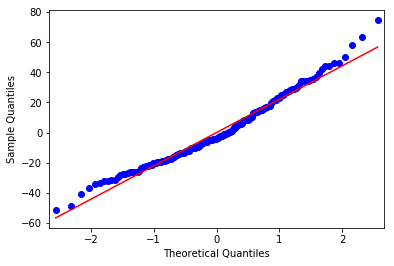

In [8]:
print(sm.qqplot(result.resid, line='r')) #q-q plot for normality

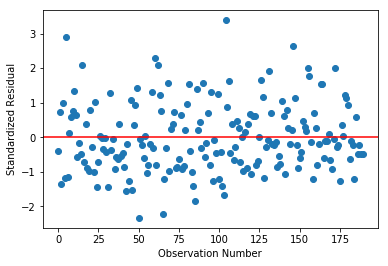

In [9]:
#standardized residuals for all observations
stdres = pd.DataFrame(result.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.show()

Figure(432x288)


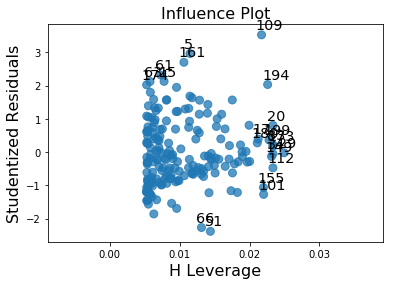

In [10]:
print(sm.graphics.influence_plot(result, size=8)) #leverage plot